In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR) 
tf.autograph.set_verbosity(0)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

imsz=128
epochs_num=100

test=np.load('../../../../../GitHubData/Datascience_AI/CV/CNN/test_128_128.npz')
train=np.load('../../../../../GitHubData/Datascience_AI/CV/CNN/train_128_128.npz')
num_classes=len(train['arr_2'])
x_train,y_train,x_test,y_test=train['arr_0'],train['arr_1'],test['arr_0'],test['arr_1']
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

# example of 4 layered convnet
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(imsz, imsz, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

# classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
import time
# 処理前の時刻
t1 = time.time() 
#
res=model.fit(datagen.flow(x_train, y_train, batch_size=32),\
                        steps_per_epoch=int(len(x_train) / 32), epochs=epochs_num, validation_data=(x_test,y_test))
# 処理後の時刻
t2 = time.time()
 
import socket
# コンピュータ名を取得
host = socket.gethostname()
print(host)  

# 経過時間を表示
elapsed_time = t2-t1
print(f"処理時間：{elapsed_time}")

Init Plugin
Num GPUs Available:  1
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
________________________

2021-12-17 13:30:31.365829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-17 13:30:31.365938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-17 13:30:32.397523: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-17 13:30:32.397733: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-17 13:30:32.527510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100
36/36 [==============================] - 2s 57ms/step - loss: 2.9332 - accuracy: 0.0694 - val_loss: 2.9089 - val_accuracy: 0.0940


2021-12-17 13:30:34.587373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
36/36 [==============================] - 2s 55ms/step - loss: 2.7718 - accuracy: 0.1344 - val_loss: 2.7865 - val_accuracy: 0.1154
Epoch 3/100
36/36 [==============================] - 2s 56ms/step - loss: 2.5493 - accuracy: 0.1872 - val_loss: 2.4422 - val_accuracy: 0.2222
Epoch 4/100
36/36 [==============================] - 2s 55ms/step - loss: 2.3959 - accuracy: 0.2504 - val_loss: 2.2507 - val_accuracy: 0.2821
Epoch 5/100
36/36 [==============================] - 2s 55ms/step - loss: 2.3035 - accuracy: 0.2636 - val_loss: 2.3629 - val_accuracy: 0.2350
Epoch 6/100
36/36 [==============================] - 2s 55ms/step - loss: 2.2598 - accuracy: 0.2707 - val_loss: 2.3943 - val_accuracy: 0.2051
Epoch 7/100
36/36 [==============================] - 2s 56ms/step - loss: 2.1699 - accuracy: 0.3023 - val_loss: 2.0801 - val_accuracy: 0.3291
Epoch 8/100
36/36 [==============================] - 2s 56ms/step - loss: 2.0828 - accuracy: 0.3260 - val_loss: 2.2202 - val_accuracy: 0.3077
Epoch 

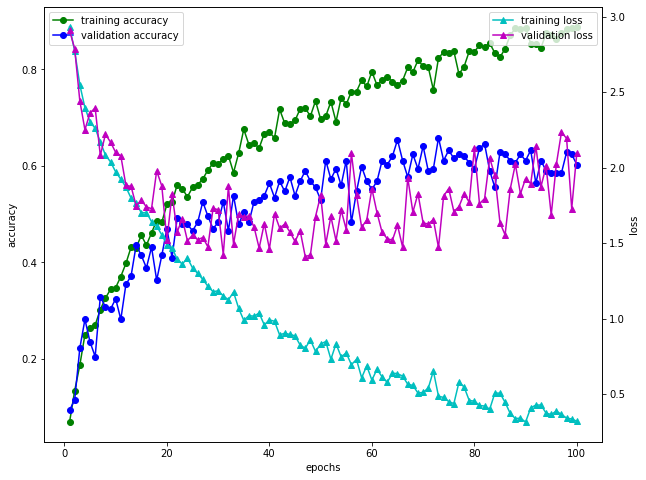

In [3]:
# result(res)に出力されたデータをプロットする。
# 図と計算結果のモデルを保存する。

import matplotlib.pyplot as plt
%matplotlib inline

acc=res.history['accuracy']
loss=res.history['loss']
val_acc=res.history['val_accuracy']
val_loss=res.history['val_loss']
epochs=range(1,len(acc)+1)
fig, ax1= plt.subplots(figsize=(10,8))
ax2=ax1.twinx()
ax1.plot(epochs, acc, '-go', label='training accuracy')
ax2.plot(epochs, loss, '-c^', label='training loss')
ax1.plot(epochs, val_acc, '-bo', label='validation accuracy')
ax2.plot(epochs, val_loss, '-m^', label='validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax1.legend()
ax2.legend()
plt.savefig('../../../../../GitHubData/Datascience_AI/CV/CNN/history/CNN_bark_'+str(imsz)+'_'+str(epochs_num)+'epo.png')
plt.show()
# modelを保存する。
model.save('../../../../../GitHubData/Datascience_AI/CV/CNN/model/CNN_bark_'+str(imsz)+'_'+str(epochs_num)+'epo.h5')

In [ ]:
hdf_source='../../../../../GitHubData/Datascience_AI/CV/CNN/model/CNN_bark_128_100epo.h5'

2021-12-17 13:57:23.973378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


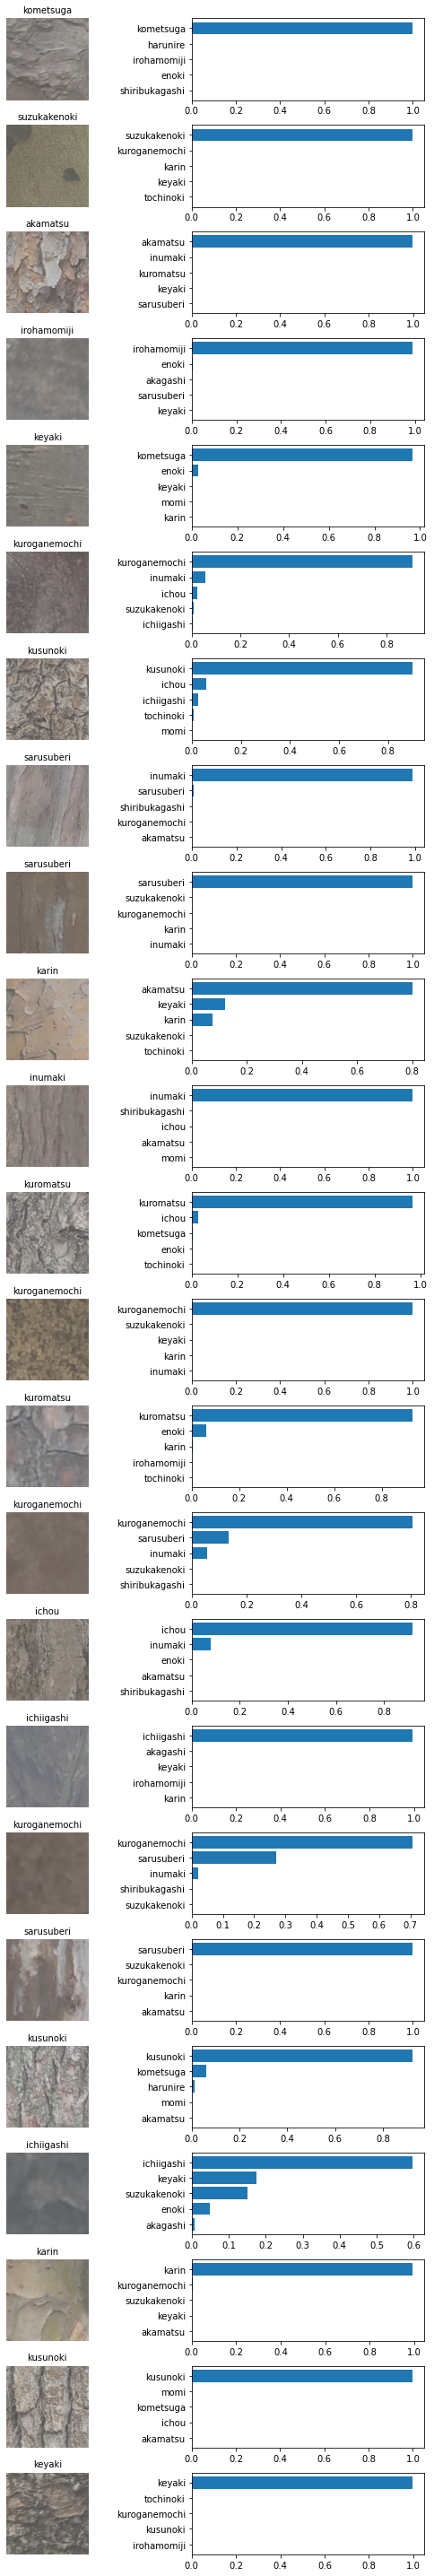

In [4]:
hdf_source='../../../../../GitHubData/Datascience_AI/CV/CNN/model/CNN_bark_128_100epo.h5'

batch_size_is=24

datagen = ImageDataGenerator()
testgen=datagen.flow(x_test,y_test, batch_size=24)

new_model = tf.keras.models.load_model(hdf_source)

X,Y=testgen.__next__()
true_classes=np.argmax(Y, axis=1)
preds_ft = new_model.predict(X)
pred_classes_ft = np.argmax(preds_ft, axis=1)

# Get the names of classes
class_names=train['arr_2']


fig, ax= plt.subplots(nrows=batch_size_is, ncols=2, figsize=(8, 40))
for i in range(batch_size_is):
    best_5=np.argsort(preds_ft[i])[-5:]
    ax[i,0].imshow(X[i]/ 2 + 0.5)
    ax[i,0].set_title(str(np.array(class_names)[true_classes[i]]),fontsize=10)
    ax[i,0].axis('off')
    label=np.array(class_names)[best_5]
    ax[i,1].barh(label,preds_ft[i][best_5])
    ax[i,1].set_yticks([0, 1, 2, 3, 4])
    ax[i,1].set_yticklabels(label,rotation=0,ha='right', fontsize=10)       
fig.tight_layout()
plt.savefig('../../../../../GitHubData/Datascience_AI/CV/CNN/prediction/prediction_tmp.jpg',dpi=200)
plt.show()

# 